In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras # always this, not import keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tf.__version__

'2.19.0'

In [9]:
mnist = keras.datasets.mnist

In [11]:
data = mnist.load_data()

In [23]:
data[0][1][1:5]

array([0, 4, 1, 9], dtype=uint8)

In [25]:
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
X_train, y_train, X_test, y_test = data[0][0], data[0][1], data[1][0], data[1][1]
X_train = X_train / 255  # greyscale 이므로 255으로 나누기. 정규화, Normalization을 하는 것임. 
X_test = X_test / 255
class_names = [str(i) for i in range(10)] # 문자열 리스트 0~9
idx = np.arange(len(X_train))
np.random.seed(42)
np.random.shuffle(idx)
X_train, y_train, X_valid, y_valid = X_train[:-10000], y_train[:-10000], X_train[-10000:], y_train[-10000:] # 학습 / 검증리스트로 나눔

### 왜 255로 나누는가?
- 딥러닝 모델이나 대부분의 머신러닝 모델은 입력 데이터가 **작은 값 (0~1 범위)**에 있을 때 더 잘 학습됩니다.
- 이유는 다음과 같습니다:
  - 수치 안정성 (Numerical Stability)
    - 큰 값들은 모델이 학습할 때 기울기 폭주(gradient explosion) 문제를 일으킬 수 있어요.
  - 빠른 수렴
    - 값이 0~1 범위에 있으면 SGD 등 최적화 알고리즘이 더 빠르게 수렴해요.
  - 일관된 입력
    - 입력값이 작고 동일한 범위 (예: 0~1) 안에 있으면 모델이 일반화하기 더 쉬워요.

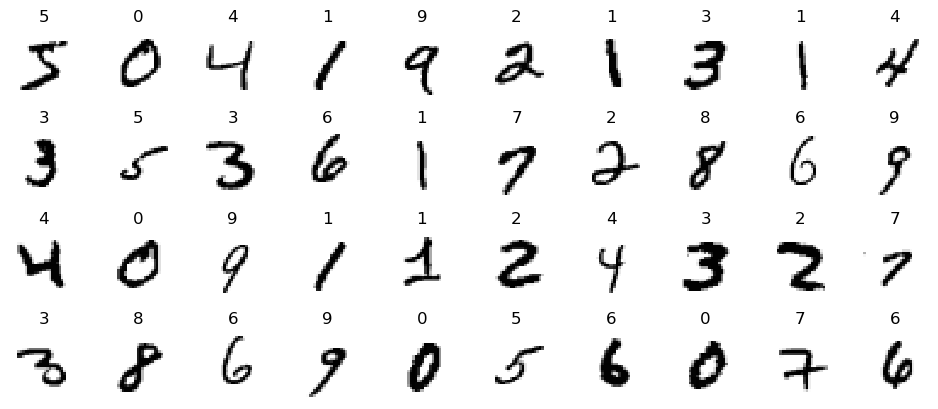

In [34]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [36]:
from tensorflow.keras import layers

In [38]:
keras

<KerasLazyLoader (keras_3) keras._tf_keras.keras as keras mode=None>

In [40]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(10, activation="softmax"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,514 (25.45 KB)

 Trainable params: 6,514 (25.45 KB)

 Non-trainable params: 0 (0.00 B)

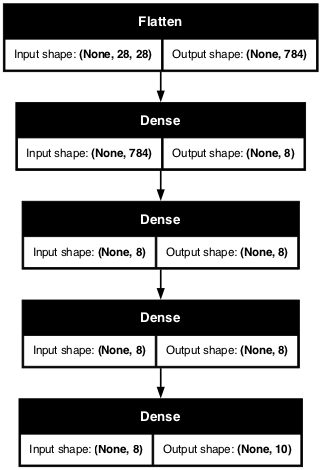

In [50]:
!pip install pydot
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True, dpi=60)


In [52]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [54]:
h = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - loss: 1.0604 - sparse_categorical_accuracy: 0.6430 - val_loss: 0.3835 - val_sparse_categorical_accuracy: 0.8889
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - loss: 0.3788 - sparse_categorical_accuracy: 0.8931 - val_loss: 0.2944 - val_sparse_categorical_accuracy: 0.9186
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - loss: 0.3028 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2749 - val_sparse_categorical_accuracy: 0.9243
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - loss: 0.2809 - sparse_categorical_accuracy: 0.9207 - val_loss: 0.2537 - val_sparse_categorical_accuracy: 0.9286
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - loss: 0.2694 - sparse_categorical_accuracy: 0.9227 - val_loss: 0.2477 - val_sparse_categorical_accuracy: 0.9298
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - loss: 0.2616 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.2495 - val_sparse_categoric

In [56]:
h.history

{'loss': [0.7005350589752197,
  0.3613761067390442,
  0.3060157299041748,
  0.2823139429092407,
  0.2668970823287964,
  0.2590603828430176,
  0.25130128860473633,
  0.24293678998947144,
  0.2383737713098526,
  0.23495009541511536],
 'sparse_categorical_accuracy': [0.7821800112724304,
  0.8975600004196167,
  0.9121800065040588,
  0.9197800159454346,
  0.9237200021743774,
  0.9261999726295471,
  0.9283999800682068,
  0.9298200011253357,
  0.9304999709129333,
  0.9320600032806396],
 'val_loss': [0.3835327625274658,
  0.29443517327308655,
  0.2748936712741852,
  0.2537449598312378,
  0.2476617395877838,
  0.24953998625278473,
  0.23769699037075043,
  0.2697528600692749,
  0.23839712142944336,
  0.2330121546983719],
 'val_sparse_categorical_accuracy': [0.8888999819755554,
  0.9186000227928162,
  0.9243000149726868,
  0.928600013256073,
  0.9297999739646912,
  0.9284999966621399,
  0.9315999746322632,
  0.920199990272522,
  0.9314000010490417,
  0.932200014591217]}

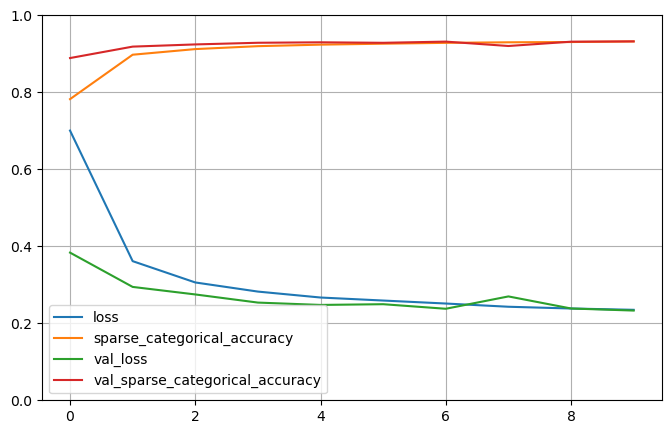

In [58]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Keras Functional APIs

In [61]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense

inputs = keras.Input(shape=(28,28,))
x = Flatten()(inputs)
y = Dense(10, activation='relu')(x)
y = Dense(10, activation='relu')(y)
# x = keras.layers.concatenate([y, x])
outputs = Dense(10, activation='sigmoid')(y)

func_model = keras.Model(inputs, outputs)


func_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

func_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
h = func_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - loss: 0.8675 - sparse_categorical_accuracy: 0.7301 - val_loss: 0.2735 - val_sparse_categorical_accuracy: 0.9237
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - loss: 0.2827 - sparse_categorical_accuracy: 0.9205 - val_loss: 0.2300 - val_sparse_categorical_accuracy: 0.9338
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9295 - val_loss: 0.2168 - val_sparse_categorical_accuracy: 0.9386
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - loss: 0.2165 - sparse_categorical_accuracy: 0.9388 - val_loss: 0.2128 - val_sparse_categorical_accuracy: 0.9425
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - loss: 0.2066 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.2008 - val_sparse_categorical_accuracy: 0.9421
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - loss: 0.1947 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.1998 - val_sparse_categoric

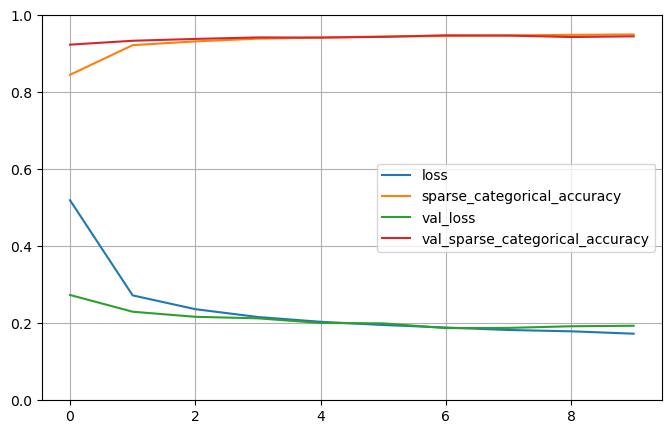

In [65]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()